# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [99]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

In [4]:
# 1.1
college = pd.read_csv('/Users/emorywise/Desktop/DS3001 Data/college_completion.csv')

In [20]:
# 1.2
college.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [21]:
# 1.2
print(college.columns)

Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first',
  

**1.2**
There are 3797 rows or observations and 63 columns.

In [22]:
# 1.3
print(pd.crosstab(college['control'], college['level']))

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


**1.3** There are more 4-year private schools (both for-profit and not-for-profit), but there are more 2-year public schools.

<AxesSubplot:xlabel='grad_100_value', ylabel='Count'>

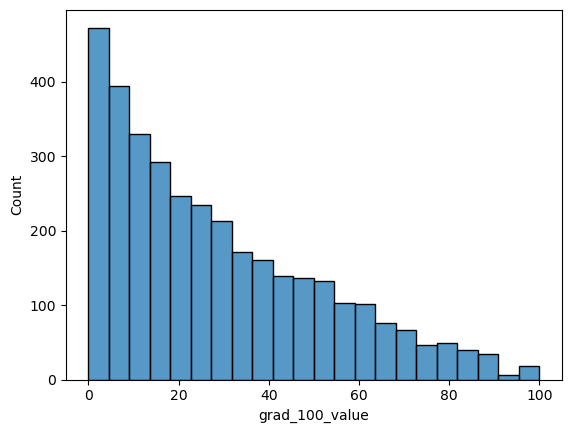

In [26]:
#1.4 Histogram
sns.histplot(college['grad_100_value'])

<AxesSubplot:ylabel='Density'>

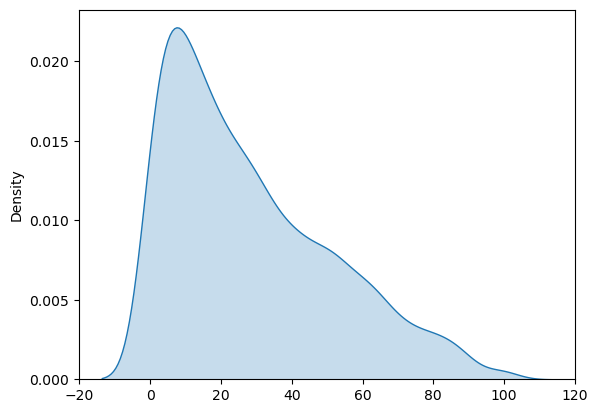

In [33]:
# 1.4 Kernal Density Plot
grad_100_value_array = np.array(college['grad_100_value']).flatten()

sns.kdeplot(grad_100_value_array, fill=True)

<AxesSubplot:ylabel='grad_100_value'>

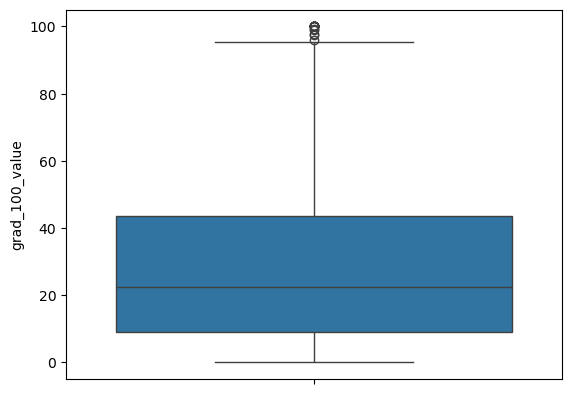

In [34]:
# 1.4 Boxplot
sns.boxplot(college['grad_100_value'])

In [35]:
# 1.4 Statistical description
college['grad_100_value'].describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

<AxesSubplot:xlabel='grad_100_value', ylabel='Density'>

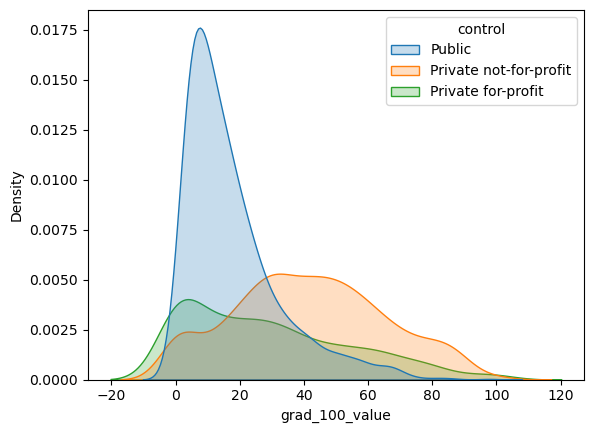

In [43]:
#1.5 Kernal density plot grouped by control
sns.kdeplot(data=college, x='grad_100_value', hue='control', fill=True)

**1.5** Students at public universities seem to graduate/earn a certificate at a far lower rate than students at private universities, especially private not-for-profit universities.

<AxesSubplot:xlabel='grad_100_value', ylabel='Density'>

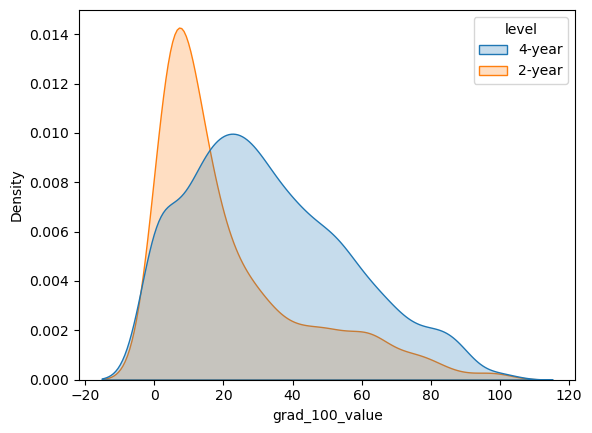

In [44]:
#1.5 Kernal density plot grouped by level
sns.kdeplot(data=college, x='grad_100_value', hue='level', fill=True)

**1.5** Students at 4-year universities seem to graduate/earn a certificate more often than students at 2-year universities

In [49]:
# 1.5
grad_grouped = college.groupby(['level', 'control'])['grad_100_value']
grad_grouped.describe()

count       mean        std  min     25%  \
level  control                                                             
2-year Private for-profit       461.0  37.197614  25.497380  0.0  15.800   
       Private not-for-profit    68.0  41.913235  28.348302  0.0  16.225   
       Public                   926.0  12.400000  10.893600  0.0   5.100   
4-year Private for-profit       318.0  17.382704  20.788525  0.0   0.000   
       Private not-for-profit  1121.0  41.645674  23.243453  0.0  25.000   
       Public                   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
level  control                                      
2-year Private for-profit      33.9  57.800  100.0  
       Private not-for-profit  44.4  61.200  100.0  
       Public                   9.4  16.175   97.8  
4-year Private for-profit      12.5  26.325  100.0  
       Private not-for-profit  41.0  57.800  100.0  
       Public                  21.8  33.800   86.3

**1.5** Private not-for-profit universities appear to have the best graduation rates.

<AxesSubplot:xlabel='grad_100_value', ylabel='Density'>

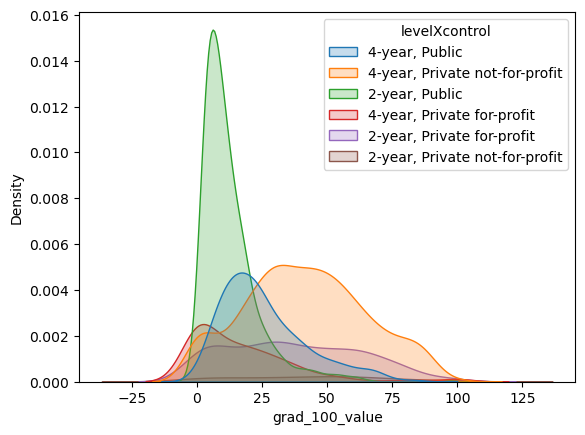

In [51]:
#1.6
college['levelXcontrol']=college['level']+', '+college['control']
sns.kdeplot(data=college, x='grad_100_value', hue='levelXcontrol', fill=True)

**1.6** According to the KDE plot, 4-year, private not-for-profit universities appear to have the highest graduation rates.

<AxesSubplot:xlabel='aid_value', ylabel='Density'>

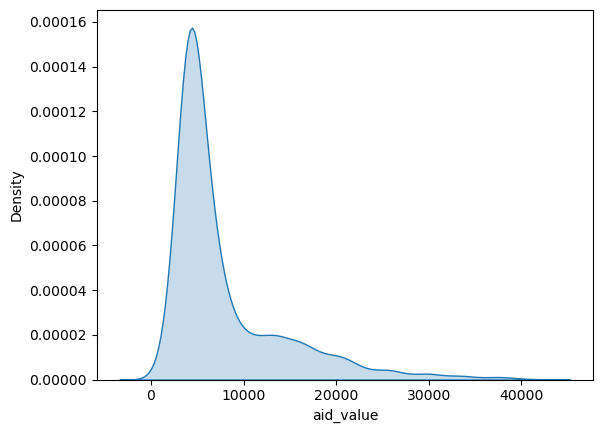

In [53]:
# 1.7
sns.kdeplot(data=college, x='aid_value', fill=True)

<AxesSubplot:xlabel='aid_value', ylabel='Density'>

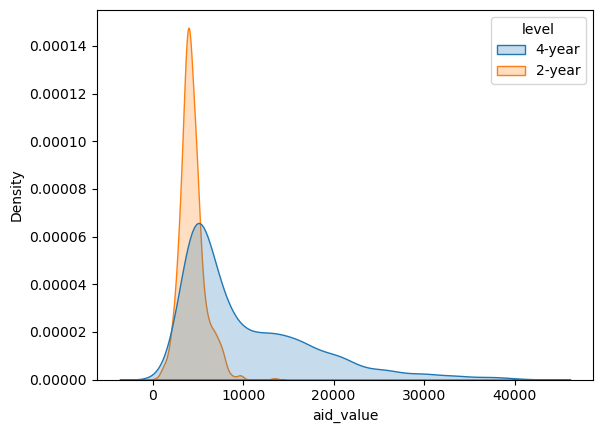

In [52]:
# 1.7
sns.kdeplot(data=college, x='aid_value', hue='level', fill=True)

<AxesSubplot:xlabel='aid_value', ylabel='Density'>

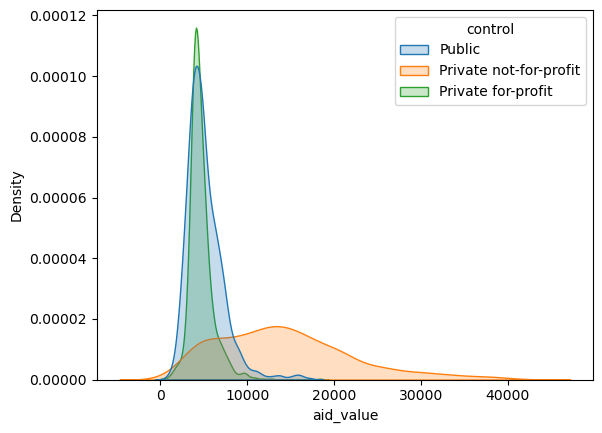

In [54]:
# 1.7
sns.kdeplot(data=college, x='aid_value', hue='control', fill=True)

**1.7** The left skewed shape of this plot overall can be explained by the fact that lots of people get a small amount of financial aid, while only a few get lots of financial aid. However, the fact that private not-for-profit has a different shape makes sense because it is both expensive and not-for-profit.

In [56]:
# 1.7
aid_grouped = college.groupby(['level', 'control'])['aid_value']
aid_grouped.describe()

count          mean          std     min  \
level  control                                                             
2-year Private for-profit       464.0   4559.681034  1286.688269   294.0   
       Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
       Public                   926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit       527.0   4696.062619  1489.410020  1580.0   
       Private not-for-profit  1180.0  14702.401695  7649.775203   902.0   
       Public                   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
level  control                                                      
2-year Private for-profit      3818.75   4286.5   5122.00   9727.0  
       Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
       Public                  3311.25   3943.5   4762.00   9809.0  
4-year Private for-profit      3885.50   4364.0   5131.50  18355.0  
       Private not-for-profit  9113.25  13774.5  18996.75  41580.0  
       Public                  4990.50   6085.0   7341.50  17299.0

<AxesSubplot:xlabel='grad_100_value', ylabel='aid_value'>

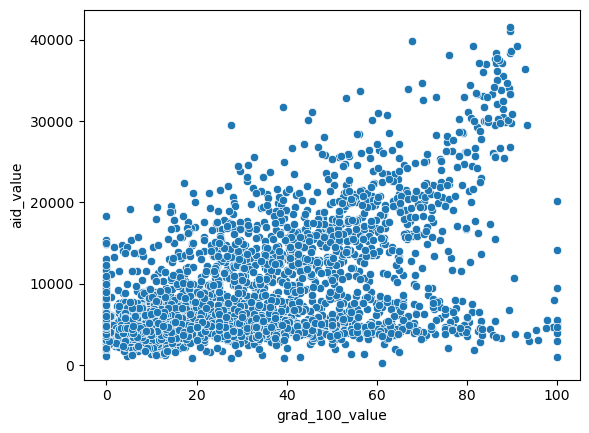

In [58]:
# 1.8
sns.scatterplot(x=college['grad_100_value'],y=college['aid_value'])

**1.8** There seems to be two slightly different groups in this scatterplot. One of them has no relationship between grad value and aid value, while the other has a positive, possibly slightly exponential relationship between grad value and aid value.

<AxesSubplot:xlabel='grad_100_value', ylabel='aid_value'>

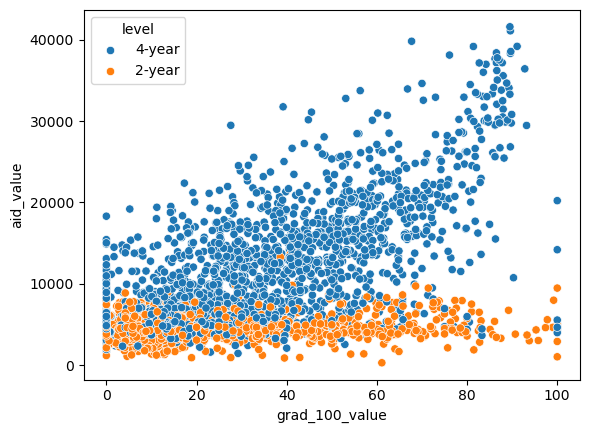

In [59]:
# 1.8
sns.scatterplot(x=college['grad_100_value'], y=college['aid_value'], hue=college['level'])

<AxesSubplot:xlabel='grad_100_value', ylabel='aid_value'>

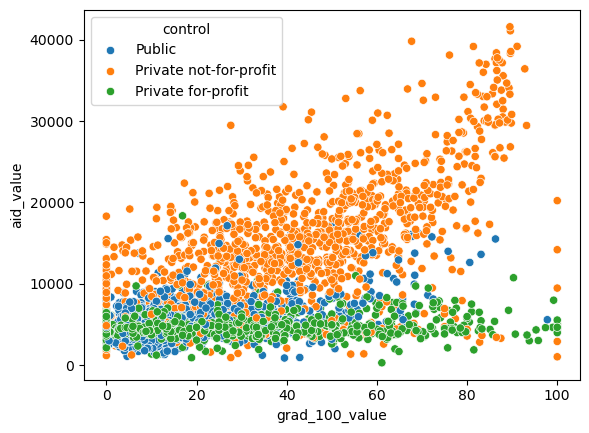

In [63]:
# 1.8
sns.scatterplot(x=college['grad_100_value'], y=college['aid_value'], hue=college['control'])

**1.8** This plot effectively shows three different groups. Aid seems to increase grad value primarily for private not-for-profit universities.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [72]:
# Load DataFrame
covid_df = pd.read_csv('/Users/emorywise/Desktop/DS3001 Data/COVID-19 Nursing Home Data/2024-09-15/COVID-19 Nursing Home Data 09.15.2024.csv', low_memory=False)

In [73]:
covid_df.head()

,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,County,Submitted Data,...,"Total Resident COVID-19 Deaths Per 1,000 Residents","Number of Residents who are Up to Date on COVID-19 Vaccinations, 14 Days or More Before Positive Test",Number of Residents Staying in this Facility for At Least 1 Day This Week,Number of All Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week,Number of Residents Staying in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Residents Up to Date with COVID-19 Vaccines,Percentage of Current Residents Up to Date with COVID-19 Vaccines,Number of Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines
0,05/24/20,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,88.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05/31/20,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,95.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/07/20,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,93.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/14/20,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,93.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/21/20,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,88.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
print(covid_df.columns)

Index(['Week Ending', 'Federal Provider Number', 'Provider Name',
       'Provider Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Provider Phone Number', 'County',
       'Submitted Data', 'Passed Quality Assurance Check',
       'Residents Weekly Confirmed COVID-19',
       'Residents Total Confirmed COVID-19', 'Residents Weekly All Deaths',
       'Residents Total All Deaths', 'Residents Weekly COVID-19 Deaths',
       'Residents Total COVID-19 Deaths', 'Number of All Beds',
       'Total Number of Occupied Beds',
       'Residents Hospitalizations with Confirmed COVID-19',
       'Residents Hospitalizations with Confirmed COVID-19 and Up to Date with Vaccines',
       'Staff Weekly Confirmed COVID-19', 'Staff Total Confirmed COVID-19',
       'Weekly Resident Confirmed COVID-19 Cases Per 1,000 Residents',
       'Weekly Resident COVID-19 Deaths Per 1,000 Residents',
       'Total Resident Confirmed COVID-19 Cases Per 1,000 Residents',
       'Total Residen

The data dictionary doesn't document how missing values are handled for categorical or quantitative variables. However, it does display the different possible values for the categorical variables. Overall, I like this data dictionary, although I have limited experience so I'm not positive what I should be looking for. It is very organized and easy to understand, and the explanations of variables are concise. It would be beneficial to have more information on missing values, but I still think the data dictionary does a decent job.

In [75]:
# Select variables of interest
covid_selected = covid_df[['Provider Name','Provider State','Residents Total Confirmed COVID-19',
                           'Residents Total COVID-19 Deaths','Number of Residents who are Up to Date on COVID-19 Vaccinations, 14 Days or More Before Positive Test'
                          ]]

I find the variables I selected interesting for a couple of reasons. I chose Covid cases and deaths because I think it would be really interesting to see how these manifested in nursing homes. I also chose the number of residents who are vaccinated as a variable because I wanted to examine in relation to the Covid cases and deaths. Finally, I chose Provider State because I wanted to be able to break down Covid cases and deaths by state.

In [76]:
covid_selected.head()

,Provider Name,Provider State,Residents Total Confirmed COVID-19,Residents Total COVID-19 Deaths,"Number of Residents who are Up to Date on COVID-19 Vaccinations, 14 Days or More Before Positive Test"
0,"BURNS NURSING HOME, INC.",AL,45.0,4.0,NaN
1,"BURNS NURSING HOME, INC.",AL,45.0,4.0,NaN
2,"BURNS NURSING HOME, INC.",AL,45.0,4.0,NaN
3,"BURNS NURSING HOME, INC.",AL,45.0,4.0,NaN
4,"BURNS NURSING HOME, INC.",AL,45.0,4.0,NaN


In [77]:
# Check variable data types
print(covid_selected.dtypes)

Provider Name                                                                                             object
Provider State                                                                                            object
Residents Total Confirmed COVID-19                                                                       float64
Residents Total COVID-19 Deaths                                                                          float64
Number of Residents who are Up to Date on COVID-19 Vaccinations, 14 Days or More Before Positive Test    float64
dtype: object


In [111]:
# Rename long column name to shorter, more useful name
covid_selected = covid_selected.rename(columns={'Number of Residents who are Up to Date on COVID-19 Vaccinations, 14 Days or More Before Positive Test': 'Vaccinations'})

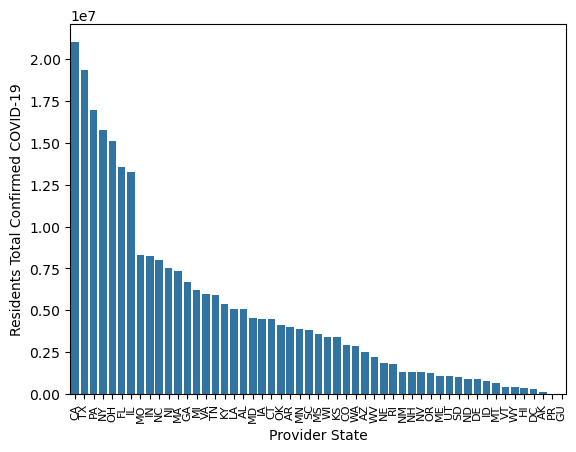

In [142]:
# Bar chart showing the total number of covid cases for each state across all providers
state_totals = covid_selected.groupby('Provider State')['Residents Total Confirmed COVID-19'].sum().reset_index()
state_totals_sorted = state_totals.sort_values(by='Residents Total Confirmed COVID-19', ascending=False)

sns.barplot(x='Provider State', y='Residents Total Confirmed COVID-19', data=state_totals_sorted)
plt.xticks(rotation=90, fontsize=8)
plt.show()

<AxesSubplot:ylabel='Residents Total Confirmed COVID-19'>

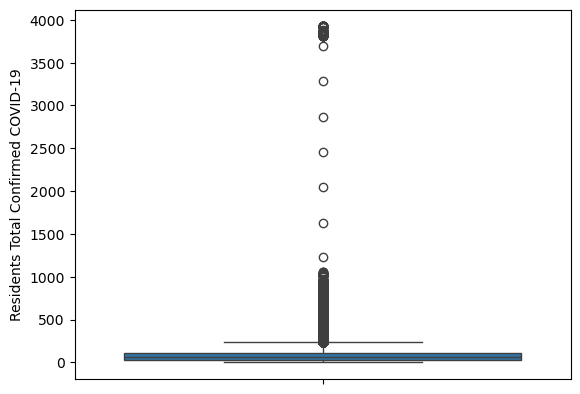

In [123]:
sns.boxplot(covid_selected['Residents Total Confirmed COVID-19'])

<AxesSubplot:ylabel='Residents Total COVID-19 Deaths'>

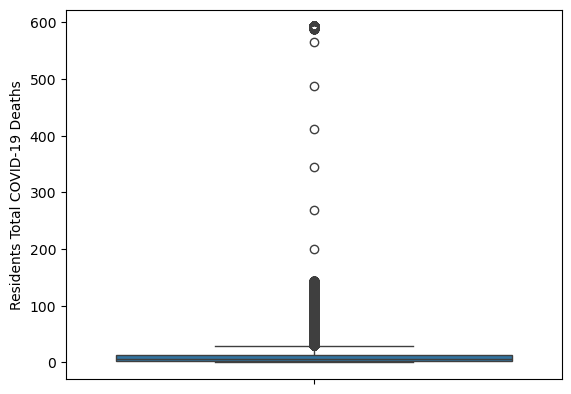

In [126]:
sns.boxplot(covid_selected['Residents Total COVID-19 Deaths'])

<AxesSubplot:ylabel='Vaccinations'>

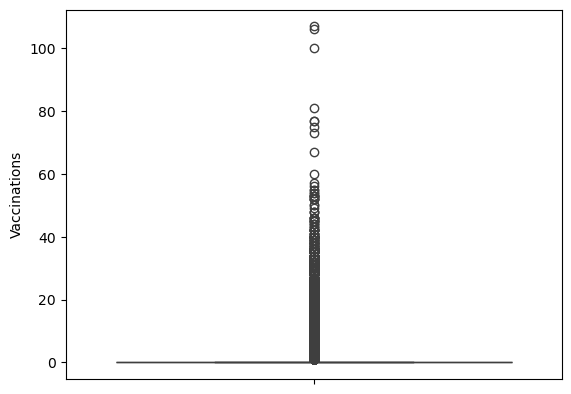

In [127]:
sns.boxplot(covid_selected['Vaccinations'])

There appear to be outliers for all of my variables, so in the next step I will clean the variables by removing the extreme outliers.

In [134]:
# Data cleaning: Filtering out outliers
filtered_covid = covid_selected[
    (covid_selected['Residents Total Confirmed COVID-19'] <= 1000) & 
    (covid_selected['Residents Total COVID-19 Deaths'] <= 150) & 
    (covid_selected['Vaccinations'] <= 60)]

<AxesSubplot:ylabel='Residents Total Confirmed COVID-19'>

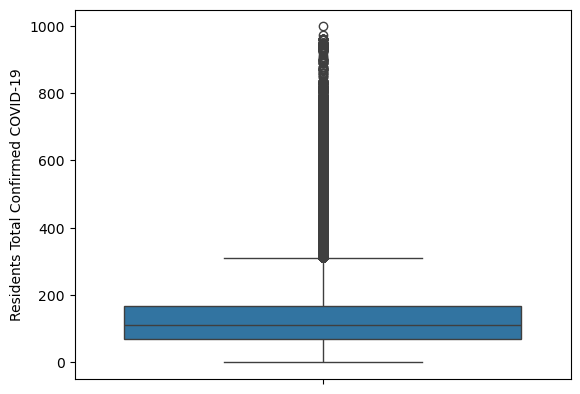

In [136]:
# Replotting Residents Total Confirmed COVID-19
sns.boxplot(filtered_covid['Residents Total Confirmed COVID-19'])

<AxesSubplot:ylabel='Residents Total COVID-19 Deaths'>

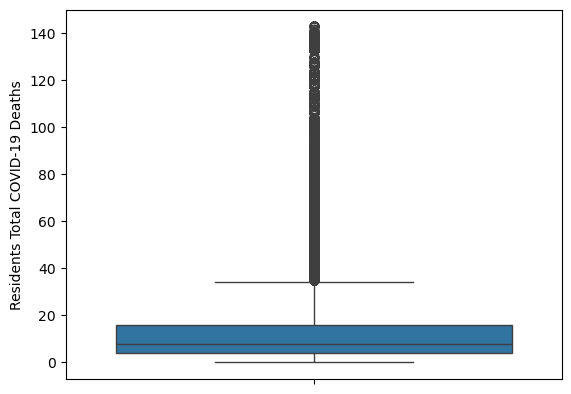

In [137]:
# Replotting Residents Total COVID-19 Deaths
sns.boxplot(filtered_covid['Residents Total COVID-19 Deaths'])

<AxesSubplot:ylabel='Vaccinations'>

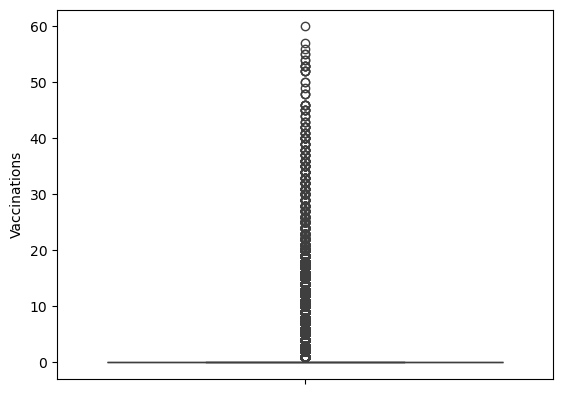

In [138]:
# Replotting Vaccinations
sns.boxplot(filtered_covid['Vaccinations'])

<AxesSubplot:ylabel='Density'>

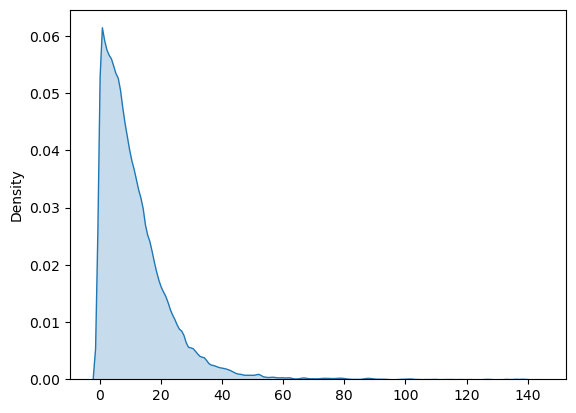

In [140]:
# Kernal Density Plot of Residents Total COVID-19 Deaths
deaths_array = np.array(filtered_covid['Residents Total COVID-19 Deaths']).flatten()

sns.kdeplot(deaths_array, fill=True)

The vast majority of providers see very few Covid deaths, however there are still a significant number of providers that have seen 15+ deaths. There are also several providers that have witness a very high number of deaths, but I don't believe there is enough evidence to necessitate rescaling.

<AxesSubplot:xlabel='Vaccinations', ylabel='Residents Total COVID-19 Deaths'>

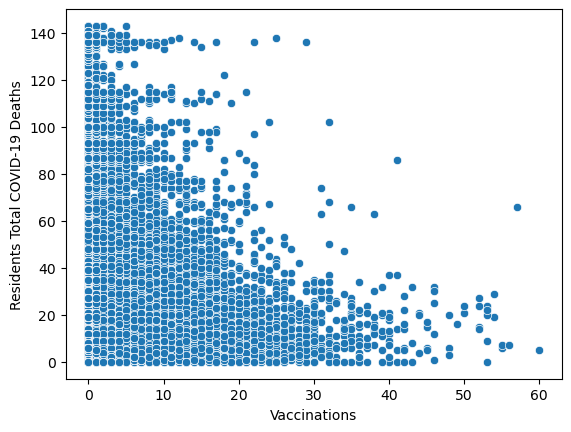

In [141]:
# Scatterplot showing the relationship between the number of vaccinations and the total covid-19 deaths for a provider
sns.scatterplot(data=filtered_covid, x='Vaccinations', y='Residents Total COVID-19 Deaths')

There generally seems to be a negative relationship between vaccinated residents and deaths.

In [146]:
# Obtain 5 number summary
pd.set_option('display.float_format', '{:.2f}'.format) # This comes from ChatGPT - Sets describe display to normal numbers instead of scientific notation

filtered_covid['Residents Total Confirmed COVID-19'].describe()

count   1087129.00
mean        126.14
std          80.37
min           0.00
25%          69.00
50%         111.00
75%         166.00
max         998.00
Name: Residents Total Confirmed COVID-19, dtype: float64

The mean of 126 seems very high to me considering what the boxplot displays. A standard deviation of 80 also seems extremely high. Possibly this hints that there are some very high values on either side of the mean that skew it. A max of 998 helps to explain why the mean and standard deviation are both higher than I expected.